# import lib

In [3]:
import pandas
import psycopg2
import configparser

# connect to db

In [4]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [5]:
cur=conn.cursor()

# q1

In [4]:
df_student=pandas.read_sql_query('select * from gp22.student',conn)
df_student[:]

,s_email,s_name,s_major
0,jdoe@dukes.jmu.edu,Jane Doe,IA
1,kdoe@dukes.jmu.edu,Kim Doe,IA
2,hdoe@dukes.jmu.edu,Hannah Doe,IA
3,jsmith@dukes.jmu.edu,James Smith,IA
4,ksmith@dukes.jmu.edu,Kendall Smith,IA


# q2

In [5]:
sql_statement = """
                select gp22.professor.p_name,
                        gp22.course.c_name
                    from gp22.professor
                    inner join gp22.course
                    on gp22.professor.p_email = gp22.course.p_email
                    """

In [6]:
df_student=pandas.read_sql_query(sql_statement,conn)
df_student[:]

,p_name,c_name
0,noel hendrickson,Intro to IA
1,stephen marrin,Cyber Intell
2,timothy walton,Intro to ML
3,john jax,Counter Terrorism
4,john jax,Intro to Python\n
5,john jax,Data Mining


# q3

In [8]:
sql_statement= """
                select c_num,
                       count(c_num) as enrolled
                from gp22.enroll_list
                group by c_num
                
                """

<AxesSubplot:xlabel='c_num'>

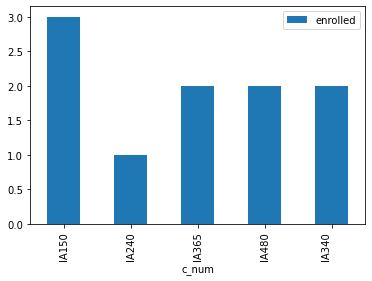

In [10]:
df_price=pandas.read_sql_query(sql_statement,conn)

df_price.plot.bar(x='c_num',y='enrolled')

# q4

In [11]:
sql_statement= """
                select gp22.professor.p_name,
                    count(gp22.course.c_name) as teaching_number
                from gp22.professor
                inner join gp22.course
                on gp22.professor.p_email = gp22.course.p_email
                group by professor.p_name
                
                """

<AxesSubplot:xlabel='p_name'>

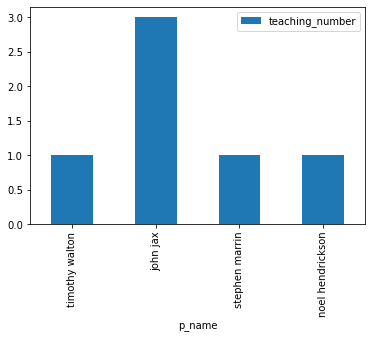

In [12]:
df_price=pandas.read_sql_query(sql_statement,conn)

df_price.plot.bar(x='p_name',y='teaching_number')

# q5

In [11]:
sql_statement = """
                insert into gp22.professor(p_email,p_name,p_office)
                values('{}','{}','{}')
                                
                """.format('s7@jmu.edu','Steve Jobs', 'ISAT 1123')

print(sql_statement)


                insert into gp22.professor(p_email,p_name,p_office)
                values('s7@jmu.edu','Steve Jobs','ISAT 1123')
                                
                


In [12]:
cur.execute(sql_statement)

In [7]:
conn.rollback()

In [13]:
conn.commit()

In [14]:
df_student=pandas.read_sql_query('select * from gp22.professor',conn)
df_student[:]

,p_email,p_name,p_office
0,hendrinx@jmu.edu,noel hendrickson,isat0150
1,marrinsp@jmu.edu,stephen marrin,engeo1204
2,waltontr@jmu.edu,timothy walton,engeo1304
3,s6@jmu.edu,Steve Jobs,ISAT 1123
4,s7@jmu.edu,Steve Jobs,ISAT 1123


In [15]:
sql_statement = """
                insert into gp22.course(c_num,c_name,p_email)
                values('{}','{}','{}')
                                
                """.format('IA 378','IA New', 's7@jmu.edu')

print(sql_statement)


                insert into gp22.course(c_num,c_name,p_email)
                values('IA 378','IA New','s7@jmu.edu')
                                
                


In [16]:
cur.execute(sql_statement)

In [17]:
conn.commit()

In [18]:
df_student=pandas.read_sql_query('select * from gp22.course',conn)
df_student[:]

,c_num,c_name,c_room,p_email
0,IA150,Intro to IA,ISAT1204,hendrinx@jmu.edu
1,IA365,Cyber Intell,EnGeo2203\n,marrinsp@jmu.edu
2,IA480,Intro to ML,ISAT2010\n,waltontr@jmu.edu
3,IA 368,IA New,None,s6@jmu.edu
4,IA450,Counter Terrorism,EnGeo 1232,s6@jmu.edu
5,IA240,Intro to Python\n,EnGeo1207,s6@jmu.edu
6,IA340\n,Data Mining,ISAT0150,s6@jmu.edu
7,IA 378,IA New,None,s7@jmu.edu


In [19]:
sql_statement = """
                update gp22.course
                set p_email = 's7@jmu.edu'
                where p_email = 's6@jmu.edu'
                """
print(sql_statement)


                update gp22.course
                set p_email = 's7@jmu.edu'
                where p_email = 's6@jmu.edu'
                


In [20]:
cur.execute(sql_statement)

In [21]:
conn.commit()

In [22]:
df_student=pandas.read_sql_query('select * from gp22.course',conn)
df_student[:]

,c_num,c_name,c_room,p_email
0,IA150,Intro to IA,ISAT1204,hendrinx@jmu.edu
1,IA365,Cyber Intell,EnGeo2203\n,marrinsp@jmu.edu
2,IA480,Intro to ML,ISAT2010\n,waltontr@jmu.edu
3,IA 378,IA New,None,s7@jmu.edu
4,IA 368,IA New,None,s7@jmu.edu
5,IA450,Counter Terrorism,EnGeo 1232,s7@jmu.edu
6,IA240,Intro to Python\n,EnGeo1207,s7@jmu.edu
7,IA340\n,Data Mining,ISAT0150,s7@jmu.edu


In [23]:
sql_statement = """
                delete from gp22.professor
                where p_email = 's6@jmu.edu'
                """
print(sql_statement)


                delete from gp22.professor
                where p_email = 's6@jmu.edu'
                


In [24]:
cur.execute(sql_statement)

In [25]:
conn.commit()

In [26]:
df_student=pandas.read_sql_query('select * from gp22.professor',conn)
df_student[:]

,p_email,p_name,p_office
0,hendrinx@jmu.edu,noel hendrickson,isat0150
1,marrinsp@jmu.edu,stephen marrin,engeo1204
2,waltontr@jmu.edu,timothy walton,engeo1304
3,s7@jmu.edu,Steve Jobs,ISAT 1123


In [27]:
cur.close()

In [28]:
conn.close()